In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import boto3

import matplotlib.pyplot as plt 

from scipy import stats
from scipy.stats import norm, skew

In [2]:
#Import Station two dataset
df_station_two = pd.read_csv('Station_two.csv')

#index the data by date 
df_station_two['Date'] = pd.to_datetime(df_station_two['Date'],format = '%d/%m/%Y', errors = 'ignore')
df_station_two = df_station_two.set_index('Date')

#return the first 5 rows
df_station_two.head(5)

,Rainfall_Simignano,Rainfall_Siena_Poggio_al_Vento,Rainfall_Mensano,Rainfall_Montalcinello,Rainfall_Monticiano_la_Pineta,Rainfall_Sovicille,Rainfall_Ponte_Orgia,Rainfall_Scorgiano,Rainfall_Pentolina,Rainfall_Monteroni_Arbia_Biena,...,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Temperature_Siena_Poggio_al_Vento,Temperature_Mensano,Temperature_Pentolina,Temperature_Monteroni_Arbia_Biena,Volume_Pozzo_1,Volume_Pozzo_3,Volume_Pozzo_4
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,5.50,0.80,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,6.20,3.25,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,7.25,0.95,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,7.00,4.20,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,7.90,6.55,NaN,NaN,NaN


In [3]:
#check the null values
df_station_two.isnull()

,Rainfall_Simignano,Rainfall_Siena_Poggio_al_Vento,Rainfall_Mensano,Rainfall_Montalcinello,Rainfall_Monticiano_la_Pineta,Rainfall_Sovicille,Rainfall_Ponte_Orgia,Rainfall_Scorgiano,Rainfall_Pentolina,Rainfall_Monteroni_Arbia_Biena,...,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Temperature_Siena_Poggio_al_Vento,Temperature_Mensano,Temperature_Pentolina,Temperature_Monteroni_Arbia_Biena,Volume_Pozzo_1,Volume_Pozzo_3,Volume_Pozzo_4
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,True,True,True,True,True,True,True,True,True,True,...,True,True,True,False,False,False,False,True,True,True
2000-01-02,True,True,True,True,True,True,True,True,True,True,...,True,True,True,False,False,False,False,True,True,True
2000-01-03,True,True,True,True,True,True,True,True,True,True,...,True,True,True,False,False,False,False,True,True,True
2000-01-04,True,True,True,True,True,True,True,True,True,True,...,True,True,True,False,False,False,False,True,True,True
2000-01-05,True,True,True,True,True,True,True,True,True,True,...,True,True,True,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2020-06-27,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2020-06-28,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
def percentage_representation_of_missing_values(data, thresh=50,color='black', edgecolor='black',width=15,height=3):
    
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh} missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()
def display_distribution(df):
    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
    sns.heatmap(df.T.isna(), cmap='Spectral')
    ax.set_title('Fields with Missing Values', fontsize=16)
    #for tick in ax.xaxis.get_major_ticks():
    #    tick.label.set_fontsize(14) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    return plt.show()


In [5]:
# most of the missing values appear before 2015 so we hive them off
df_station_two = df_station_two[df_station_two.index >='2015-01-01']

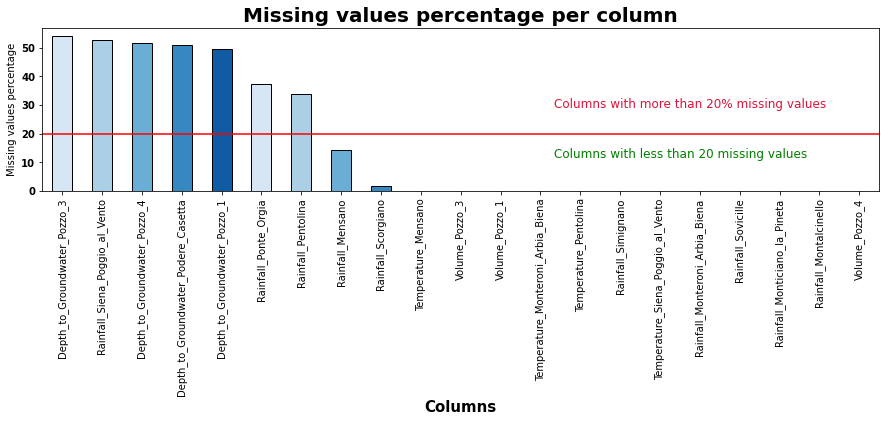

In [6]:
#display missing values distribution in percentages - more than 20 missing values
percentage_representation_of_missing_values(df_station_two,20,color=sns.color_palette('Blues',5))

In [7]:
#Rainfall, Groundwater and volume seem to be missing the most data while temperature is missing none 

In [8]:
#Plot the data to get a better idea on cleaning the data

#get column names
df_station_two.columns

Index(['Rainfall_Simignano', 'Rainfall_Siena_Poggio_al_Vento',
       'Rainfall_Mensano', 'Rainfall_Montalcinello',
       'Rainfall_Monticiano_la_Pineta', 'Rainfall_Sovicille',
       'Rainfall_Ponte_Orgia', 'Rainfall_Scorgiano', 'Rainfall_Pentolina',
       'Rainfall_Monteroni_Arbia_Biena', 'Depth_to_Groundwater_Podere_Casetta',
       'Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_3',
       'Depth_to_Groundwater_Pozzo_4', 'Temperature_Siena_Poggio_al_Vento',
       'Temperature_Mensano', 'Temperature_Pentolina',
       'Temperature_Monteroni_Arbia_Biena', 'Volume_Pozzo_1', 'Volume_Pozzo_3',
       'Volume_Pozzo_4'],
      dtype='object')

In [9]:
#Group similar variables
Station_two_rainfall = ['Rainfall_Simignano','Rainfall_Siena_Poggio_al_Vento','Rainfall_Mensano','Rainfall_Montalcinello','Rainfall_Monticiano_la_Pineta','Rainfall_Sovicille','Rainfall_Ponte_Orgia','Rainfall_Scorgiano','Rainfall_Pentolina','Rainfall_Monteroni_Arbia_Biena']
Station_two_groundwater = ['Depth_to_Groundwater_Podere_Casetta','Depth_to_Groundwater_Pozzo_1','Depth_to_Groundwater_Pozzo_3','Depth_to_Groundwater_Pozzo_4']
Station_two_temperature = ['Temperature_Siena_Poggio_al_Vento','Temperature_Mensano','Temperature_Pentolina','Temperature_Monteroni_Arbia_Biena']
Station_two_volume = ['Volume_Pozzo_1','Volume_Pozzo_3','Volume_Pozzo_4']

In [10]:
#change the scale to logarithmic for data visualization
df_station_two['Volume_Pozzo_1_log10'] = -np.log10(abs(df_station_two['Volume_Pozzo_1']))
df_station_two['Volume_Pozzo_3_log10'] = -np.log10(abs(df_station_two['Volume_Pozzo_3']))
df_station_two['Volume_Pozzo_4_log10'] = -np.log10(abs(df_station_two['Volume_Pozzo_4']))
Station_two_volume_log = ['Volume_Pozzo_1_log10','Volume_Pozzo_3_log10','Volume_Pozzo_4_log10']

#changing the scale may create infinite value so we replace 'inf' value by 'nan' values
df_station_two[Station_two_volume_log] = df_station_two[Station_two_volume_log].replace([np.inf, -np.inf],np.nan).fillna(0)

/home/moringa/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
def plot_data():
#separate columns into smaller dfs 
 df_Station_two_rainfall = df_station_two[Station_two_rainfall]
 df_Station_two_groundwater = df_station_two[Station_two_groundwater]
 df_Station_two_temperature = df_station_two[Station_two_temperature]
 df_Station_two_volume_log = df_station_two[Station_two_volume_log]

#plot data 
 ax = df_Station_two_rainfall.plot(figsize=(15,6), fontsize=12,linewidth=2)
 ax.set_xlabel('Date',fontsize=16)
 ax.set_ylabel('mm', fontsize=16)
 ax.set_title('Station Two: Rainfall data', fontsize=16)
 ax.legend(bbox_to_anchor=(1,0,5,1), loc='lower center')
    
 ax1 = df_Station_two_groundwater.plot(figsize=(15,6), fontsize=12,linewidth=2)
 ax1.set_xlabel('Date',fontsize=16)
 ax1.set_ylabel('mm', fontsize=16)
 ax1.set_title('Station Two: Groundwater', fontsize=16)
 ax1.legend(bbox_to_anchor=(1,0,5,1), loc='lower center')

 ax = df_Station_two_temperature.plot(figsize=(15,6), fontsize=12,linewidth=2)
 ax.set_xlabel('Date',fontsize=16)
 ax.set_ylabel('mm', fontsize=16)
 ax.set_title('Station Two: Temperature data', fontsize=16)
 ax.legend(bbox_to_anchor=(1,0,5,1), loc='lower center')
    
 ax1 = df_Station_two_volume_log.plot(figsize=(15,6), fontsize=12,linewidth=2)
 ax1.set_xlabel('Date',fontsize=16)
 ax1.set_ylabel('mm', fontsize=16)
 ax1.set_title('Station Two: Volume Log', fontsize=16)
 ax1.legend(bbox_to_anchor=(1,0,5,1), loc='lower center')

 plt.show()

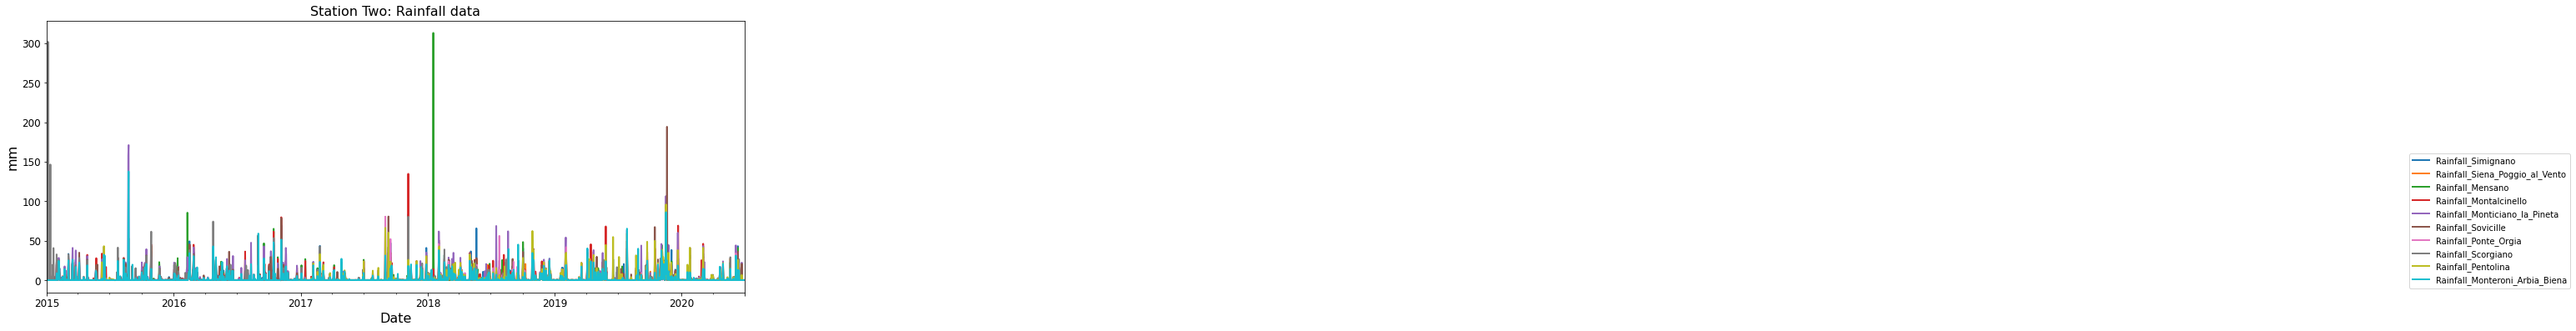

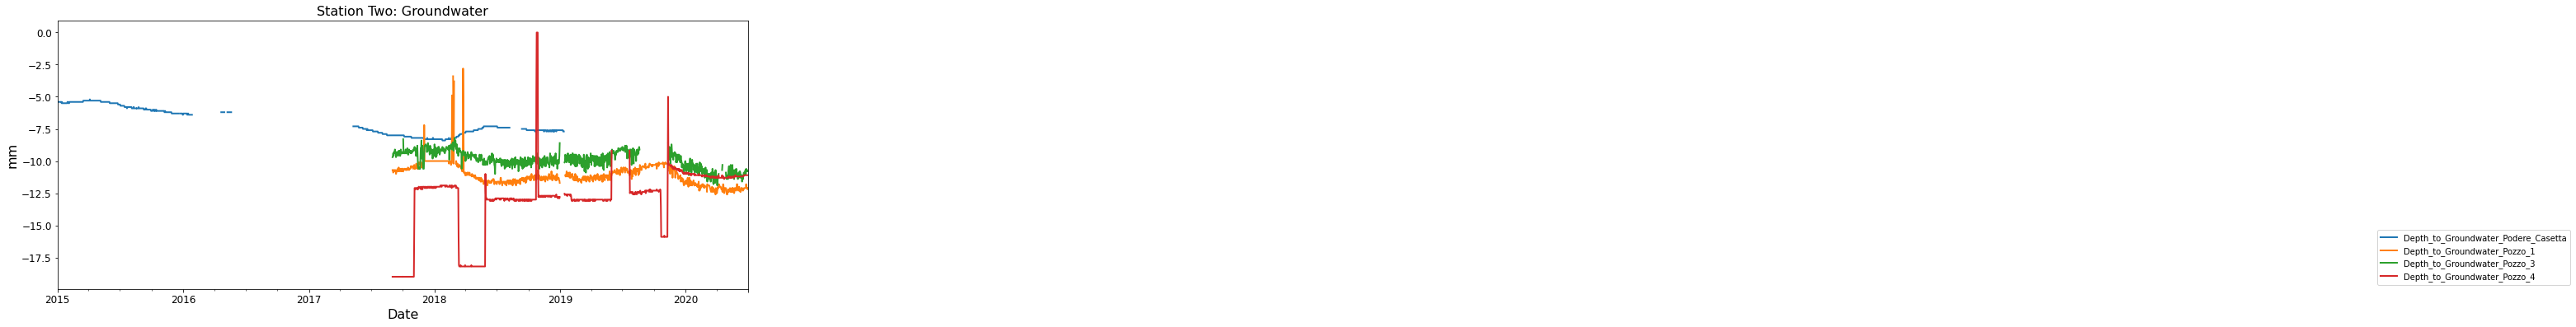

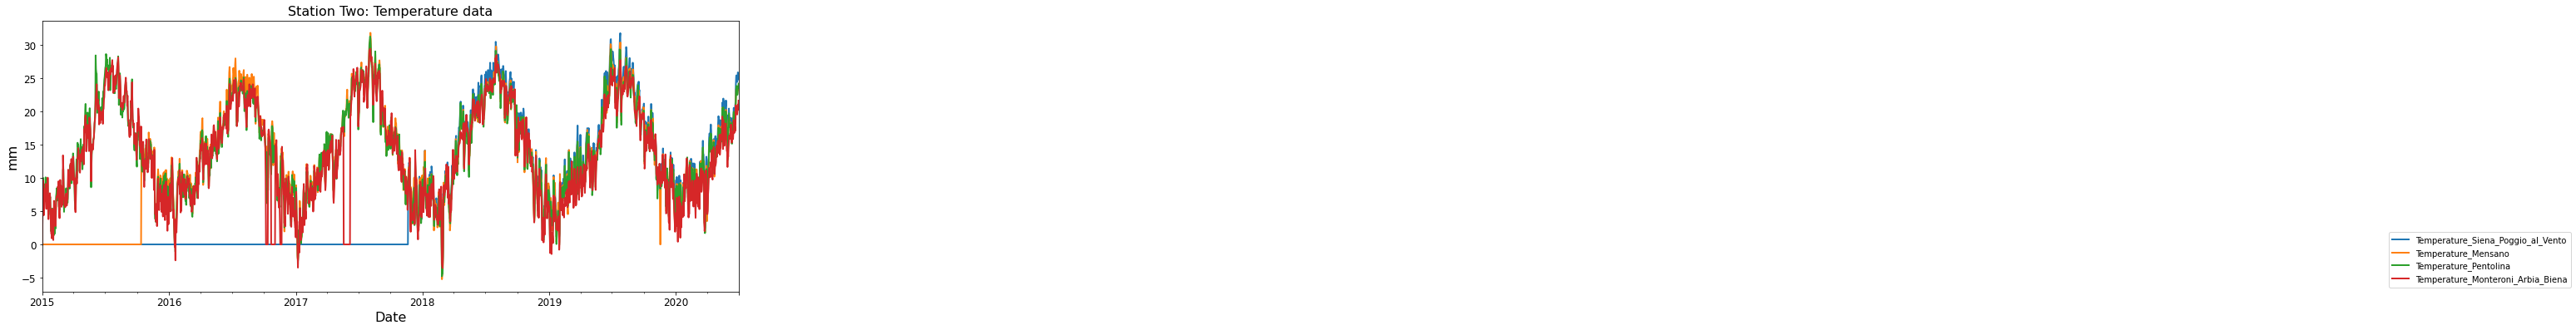

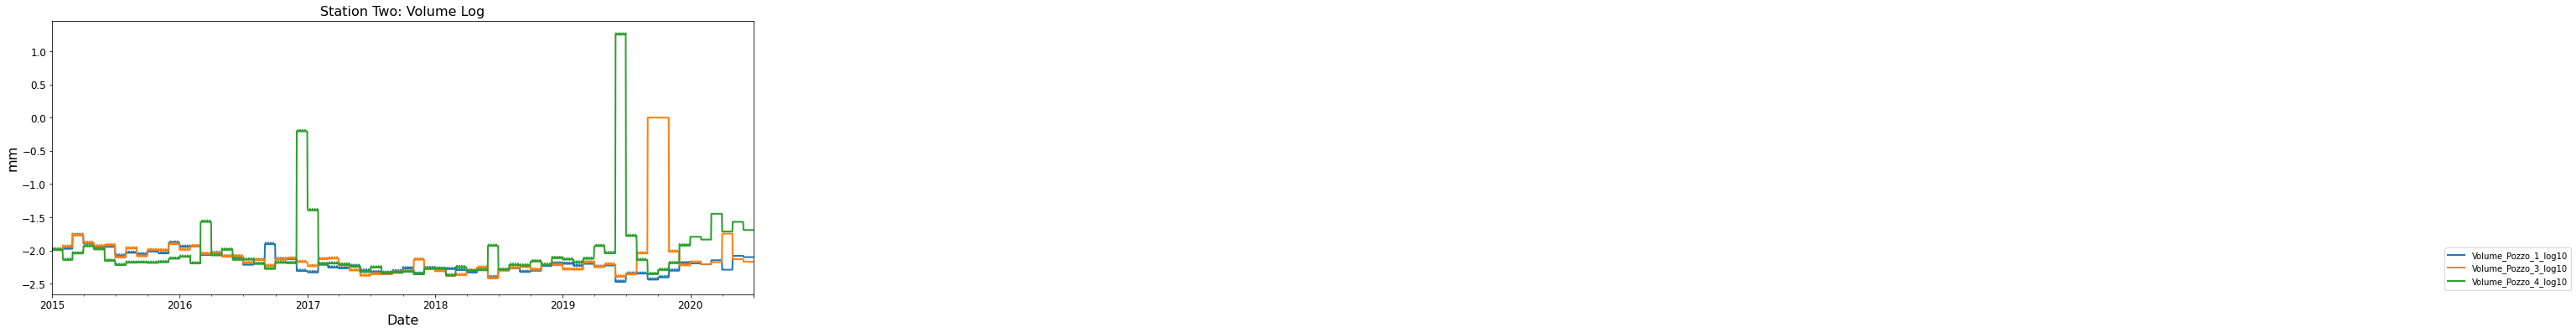

In [12]:
plot_data()

In [13]:
#remove suspicious values seen in the plots
print(df_station_two['Depth_to_Groundwater_Podere_Casetta'].sort_values(ascending=False).head)
print(df_station_two['Rainfall_Siena_Poggio_al_Vento'].sort_values(ascending=False).head)
print(df_station_two['Depth_to_Groundwater_Pozzo_4'].sort_values(ascending=False).head)
print(df_station_two['Depth_to_Groundwater_Podere_Casetta'].sort_values(ascending=False).head)
print(df_station_two['Depth_to_Groundwater_Pozzo_1'].sort_values(ascending=False).head)
print(df_station_two['Rainfall_Ponte_Orgia'].sort_values(ascending=False).head)
print(df_station_two['Rainfall_Pentolina'].sort_values(ascending=False).head)
print(df_station_two['Rainfall_Mensano'].sort_values(ascending=False).head)
print(df_station_two['Rainfall_Scorgiano'].sort_values(ascending=False).head)

<bound method NDFrame.head of Date
2015-04-05   -5.2
2015-03-31   -5.3
2015-04-07   -5.3
2015-04-09   -5.3
2015-04-10   -5.3
             ... 
2020-06-26    NaN
2020-06-27    NaN
2020-06-28    NaN
2020-06-29    NaN
2020-06-30    NaN
Name: Depth_to_Groundwater_Podere_Casetta, Length: 2008, dtype: float64>
<bound method NDFrame.head of Date
2019-11-17    79.2
2019-10-16    40.6
2019-04-05    36.0
2018-02-02    35.6
2018-11-01    34.0
              ... 
2017-11-18     NaN
2017-11-19     NaN
2017-11-20     NaN
2017-11-21     NaN
2017-11-22     NaN
Name: Rainfall_Siena_Poggio_al_Vento, Length: 2008, dtype: float64>
<bound method NDFrame.head of Date
2018-10-28    0.0
2018-10-27    0.0
2018-10-26    0.0
2018-10-25    0.0
2018-10-24   -4.6
             ... 
2019-07-17    NaN
2019-07-18    NaN
2019-07-19    NaN
2019-07-20    NaN
2019-07-21    NaN
Name: Depth_to_Groundwater_Pozzo_4, Length: 2008, dtype: float64>
<bound method NDFrame.head of Date
2015-04-05   -5.2
2015-03-31   -5.3
2015-04-07  

In [14]:
#replace missing value noted with '0' by the previous data
df_station_two['Depth_to_Groundwater_Pozzo_4'] = df_station_two['Depth_to_Groundwater_Pozzo_4'].replace(to_replace=0, method='ffill')

#replace nan value with mean of the month of the year
#first create two columns with the month and the year
df_station_two['Month'] = pd.DatetimeIndex(df_station_two.index).month
df_station_two['Year'] = pd.DatetimeIndex(df_station_two.index).year

#replace nan value by the mean of the month of the year 
df_station_two.fillna(df_station_two.groupby(['Month','Year']).transform('mean'),inplace=True)

#if the nan value still persists, replace with the yearly min 
df_station_two.fillna(df_station_two.groupby(['Month']).transform('mean'),inplace=True)


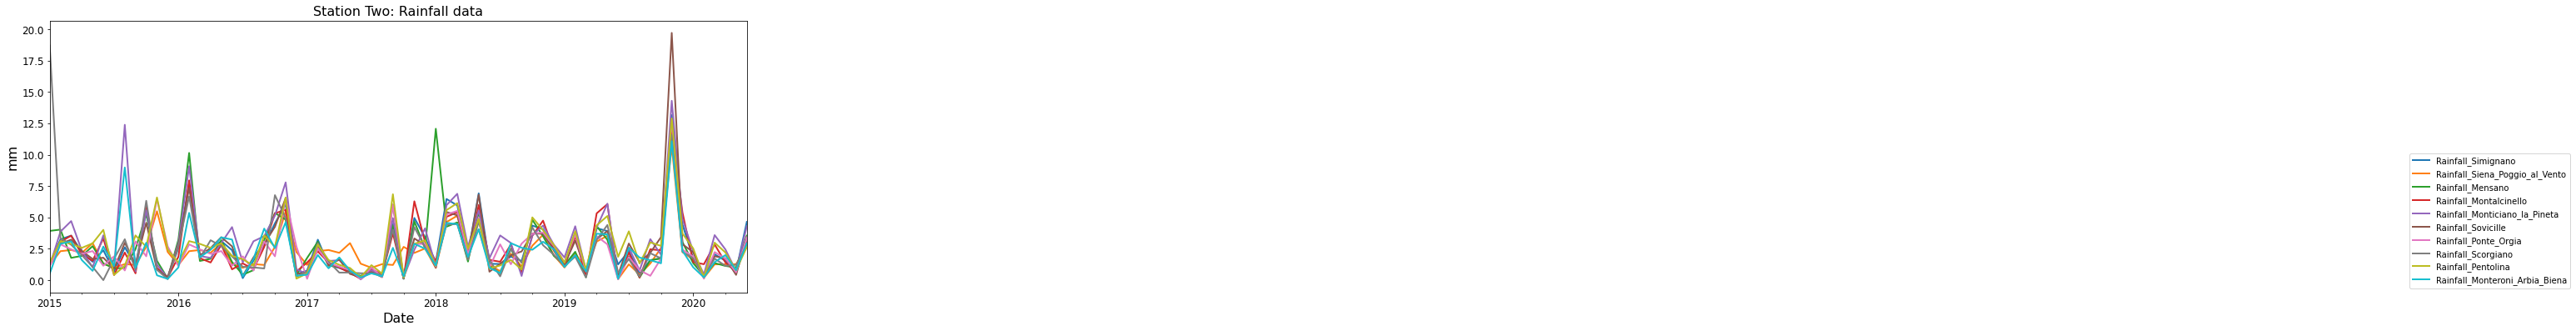

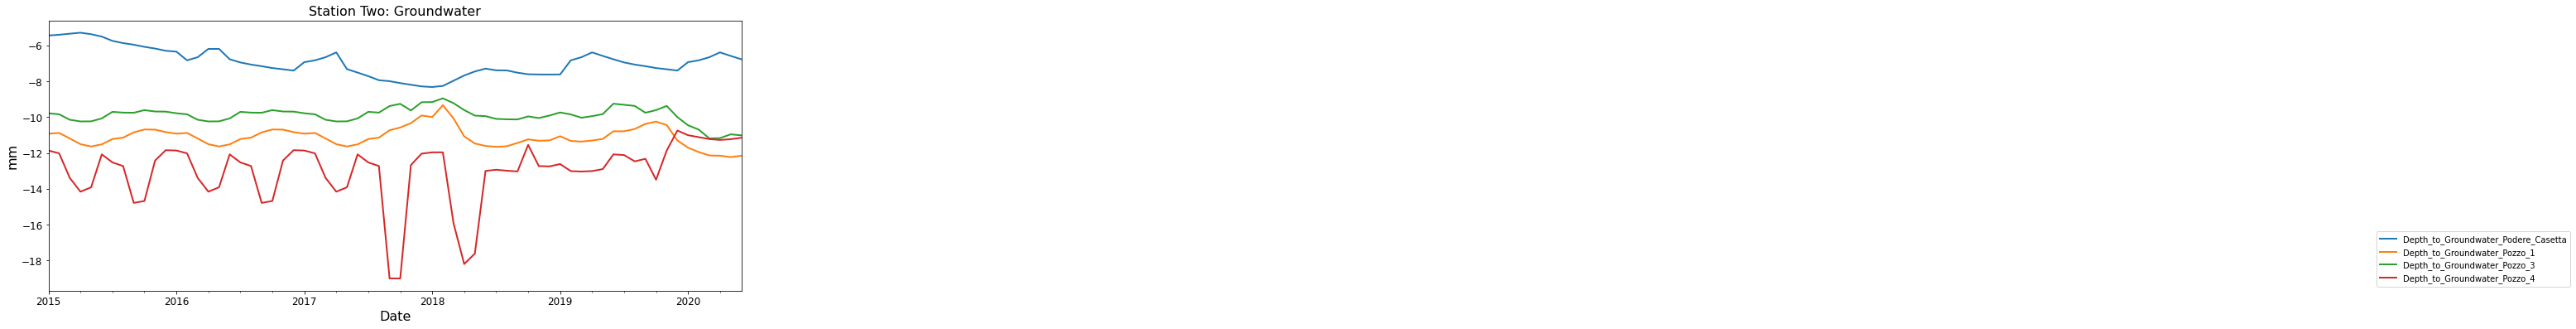

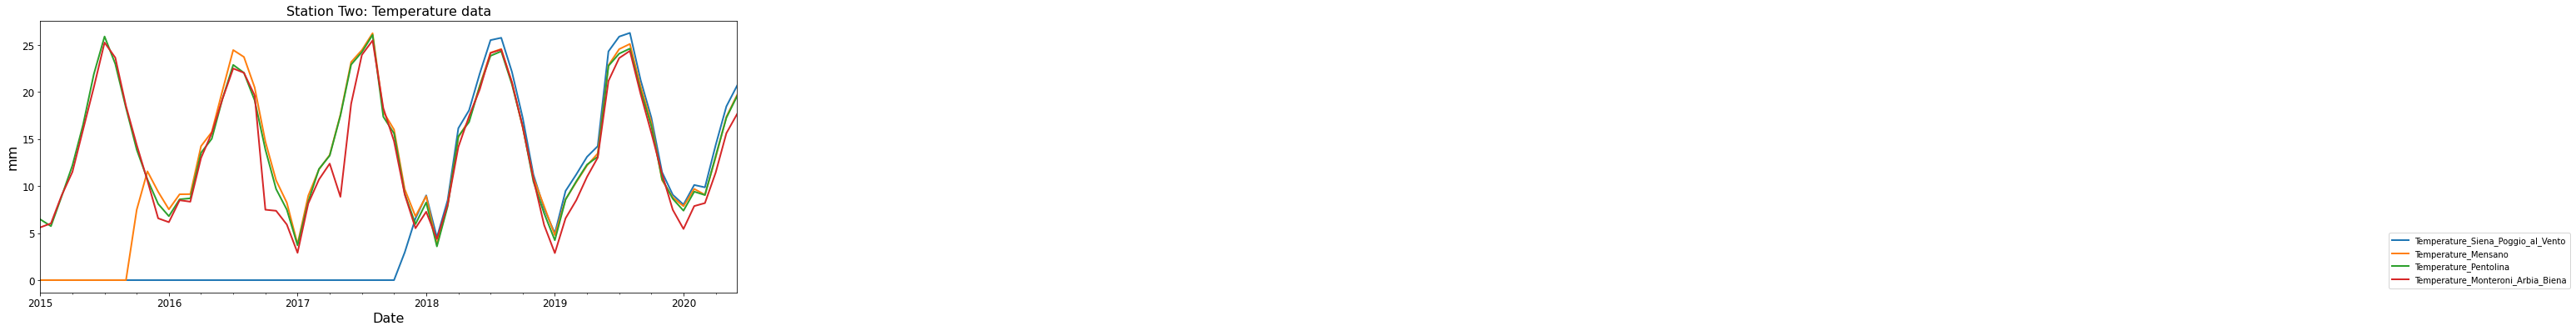

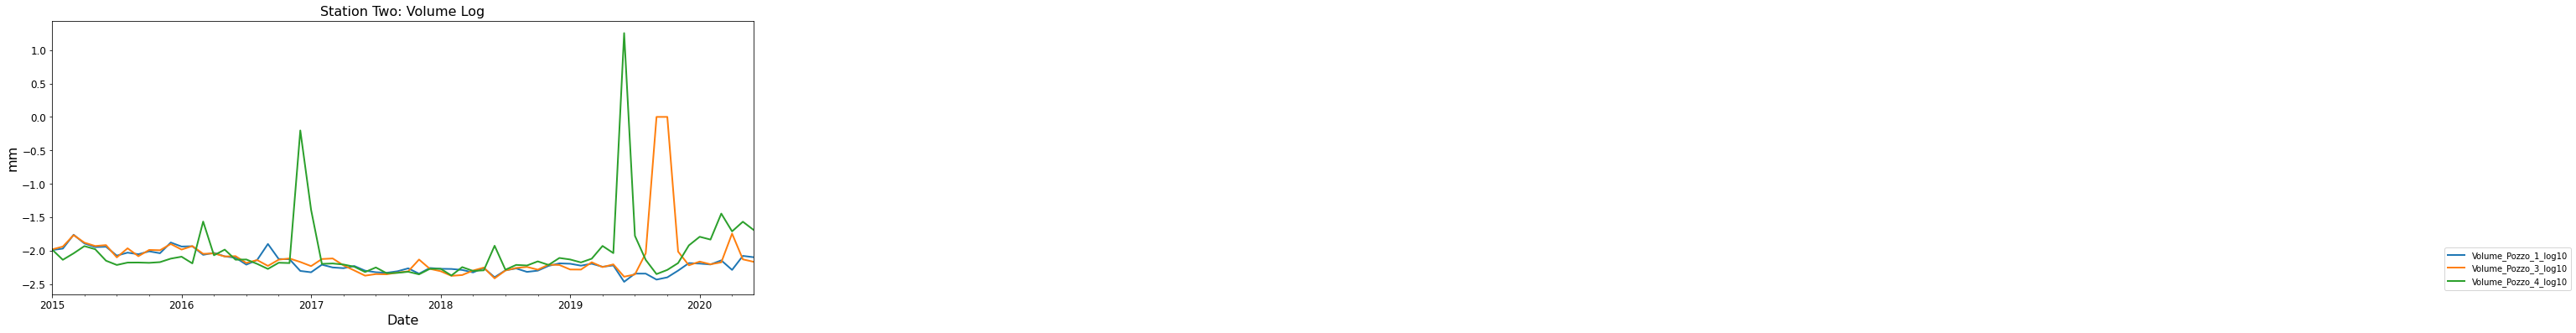

In [15]:
#now resample looking at the monthly value 
df_station_two = df_station_two.resample('M').mean()

plot_data()

In [16]:
#calculate monthly mean temperature, mean rainfall and mean groundwater levels  
df_station_two['mean_temperature'] = df_station_two[['Temperature_Siena_Poggio_al_Vento','Temperature_Mensano','Temperature_Pentolina','Temperature_Monteroni_Arbia_Biena']].mean(axis=1)
df_station_two['mean_rainfall'] = df_station_two[Station_two_rainfall].mean(axis=1)
df_station_two['mean_groundwater'] = df_station_two[Station_two_groundwater].mean(axis=1)

#total monthly volume of pumping water
df_station_two['sum_volume_log'] = df_station_two[Station_two_volume_log].mean(axis=1)




In [17]:
df_station_two.head()

,Rainfall_Simignano,Rainfall_Siena_Poggio_al_Vento,Rainfall_Mensano,Rainfall_Montalcinello,Rainfall_Monticiano_la_Pineta,Rainfall_Sovicille,Rainfall_Ponte_Orgia,Rainfall_Scorgiano,Rainfall_Pentolina,Rainfall_Monteroni_Arbia_Biena,...,Volume_Pozzo_4,Volume_Pozzo_1_log10,Volume_Pozzo_3_log10,Volume_Pozzo_4_log10,Month,Year,mean_temperature,mean_rainfall,mean_groundwater,sum_volume_log
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-31,1.335484,1.215054,3.930323,1.232258,1.148387,1.387097,1.131797,18.696774,1.400000,0.529032,...,-96.224977,-1.991657,-1.982143,-1.983224,1.0,2015.0,3.018548,3.200621,-9.508254,-1.985675
2015-02-28,3.257143,2.312941,4.033803,3.064286,3.871429,2.914286,2.854867,3.335714,3.116814,2.900000,...,-137.221935,-1.969771,-1.939213,-2.137354,2.0,2015.0,2.943750,3.166128,-9.542023,-2.015446
2015-03-31,3.554839,2.408602,1.781935,3.548387,4.709677,3.232258,2.461290,2.825806,2.896774,3.090323,...,-109.815173,-1.762455,-1.768826,-2.040586,3.0,2015.0,4.484677,3.050989,-10.023723,-1.857289
2015-04-30,2.240000,2.182222,1.940000,2.053333,2.333333,2.333333,2.100000,1.993333,2.580000,1.600000,...,-85.600858,-1.892861,-1.880498,-1.932413,4.0,2015.0,5.923750,2.135556,-10.304583,-1.901924
2015-05-31,1.470968,2.956989,2.714839,1.554839,1.025806,1.690323,2.322581,1.064516,2.940323,0.748387,...,-95.369587,-1.947435,-1.931209,-1.979334,5.0,2015.0,8.143145,1.848957,-10.295161,-1.952659


In [18]:
filtered_df_station_two = df_station_two['mean_groundwater']
print(filtered_df_station_two)

Date
2015-01-31    -9.508254
2015-02-28    -9.542023
2015-03-31   -10.023723
2015-04-30   -10.304583
2015-05-31   -10.295161
                ...    
2020-02-29   -10.152478
2020-03-31   -10.306048
2020-04-30   -10.250417
2020-05-31   -10.255938
2020-06-30   -10.278611
Freq: M, Name: mean_groundwater, Length: 66, dtype: float64


In [19]:
filtered_df_station_two.to_csv('cleaned_station_two.csv', sep='\t')

In [20]:
df_station_two.to_csv('cleaned_df_station_two.csv', sep='\t')


In [21]:
#calculate effective rainfall 
#We know that a part of the rainfall is used by the vegetation, it is what is called the evapotranspiration (=EVP). So toconsider EVP, we made the following assumptiion. When the temperature is high all the rainfall is used by the vegetation (EVP = 100%). Inversely, when the temperature is low, EVP is low (EVP = 0 %) and all the rainfall infiltrate into the ground



In [22]:
# df_station_two.loc[:,'percentage_evapotranspiration'] = (df_station_two['mean_temperature']*100) / (df_station_two['mean_temperature'].max()

# -df_station_two['mean_temperature'].min())
# df_station_two.loc[:,'percentage_evapotranspiration'] = df_station_two['percentage_evapotranspiration'] - df_station_two['percentage_evapotranspiration'].min()
# df_station_two = df_station_two.drop(columns=['percentage_evapotranspiration'])

# # calculate effective rainfall: rainfall minus evapotranspiration
# df_station_two.loc[:, 'effective_rainfall'] = df_station_two['mean_rainfall'] - \
#                                        df_station_two['mean_rainfall']*df_station_two['percentage_evapotranspiration']/100 
